In [1]:
import sys
sys.path = ["../.."] + sys.path # 切换到项目目录下

import scanpy as sc
import scvelo as scv
import velovgi

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


Global seed set to 0
/usr/local/conda/envs/velovi-env/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/usr/local/conda/envs/velovi-env/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


## 1. 读取数据

In [2]:
# 红系成熟部分
adata = scv.read("/mnt/h/F_bak/PyCode/xijing/notebook/data/Gastrulation/erythroid_lineage.h5ad")
# sc.pp.subsample(adata, n_obs=500)
# 这里就不能在随机抽样了，为了与之前抽样作比较，这里需要与之前的细胞完全一致
adata2 = scv.read("./tmp/erythroid_lineage2/adata/adata.h5ad")
adata = adata[list(adata2.obs.index)].copy()
batch_key = "stage"
cluster_key = "celltype"
adata

AnnData object with n_obs × n_vars = 500 × 53801
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm'
    uns: 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

In [3]:
adata_bak = adata.copy()

## 2. 其他批次结果整合的结果对比

In [4]:
# # 环境冲突不能在这里直接调用
# from velovgi.preprocessing import latentvelo_preprocess, review_preprocess # 这个包只能单独提出来，或者出错的话，多次导入几次
# # adata = adata_bak.copy()
# # review_preprocess(adata, batch_key=batch_key, cluster_key=cluster_key, save = "./tmp/corrected_erythroid_lineage_tmp_review.h5ad")
# # adata = adata_bak.copy()
# # latentvelo_preprocess(adata, batch_key=batch_key, cluster_key=cluster_key, save = "./tmp/corrected_erythroid_lineage_tmp_latentvelo.h5ad")

adata_review = scv.read("./tmp/corrected_erythroid_lineage_tmp_review.h5ad")
adata_latentvelo = scv.read("./tmp/corrected_erythroid_lineage_tmp_latentvelo.h5ad")

scv.tl.velocity(adata_review)
scv.tl.velocity_graph(adata_review)

scv.tl.velocity(adata_latentvelo)
scv.tl.velocity_graph(adata_latentvelo)

adata_review, adata_latentvelo

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


  0%|          | 0/500 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


  0%|          | 0/500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


(AnnData object with n_obs × n_vars = 500 × 2000
     obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
     var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
     uns: 'celltype_colors', 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
     obsm: 'X_pca', 'X_umap'
     layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'velocity', 'variance_velocity'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 500 × 2000
     obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
     var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'M

load ./tmp/erythroid_lineage2/adata//adata.h5ad
load ./tmp/erythroid_lineage2/adata//sample_recover.pkl


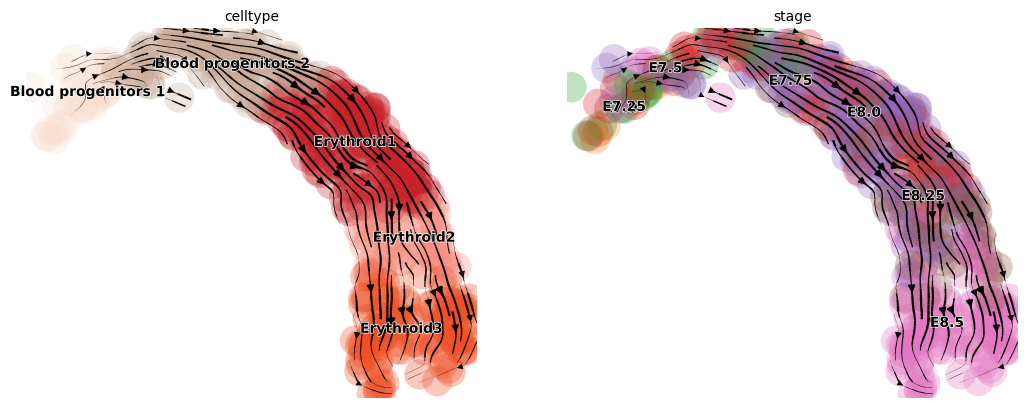

In [5]:
adata = velovgi.tl.read_adata("./tmp/erythroid_lineage2/adata/") # 后续的绘图都是在这个处理后的adata上做的
scv.pl.velocity_embedding_stream(adata, color=[cluster_key, batch_key]) # 添加批次的颜色
adata_review.uns["%s_colors"%batch_key] = adata.uns["%s_colors"%batch_key]
adata_latentvelo.uns["%s_colors"%batch_key] = adata.uns["%s_colors"%batch_key]

1. 可视化对比，只能恢复一些局部的分化方向，而无法恢复全局

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


<AxesSubplot: title={'center': 'velovgi'}>

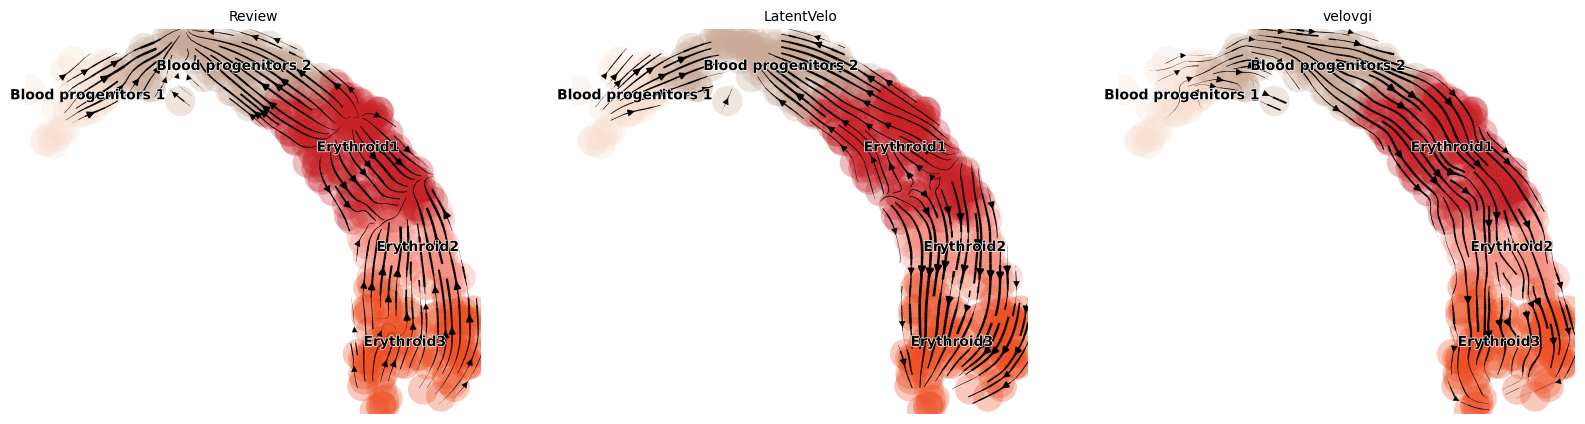

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(20,5))
scv.pl.velocity_embedding_stream(adata_review, color=cluster_key, title="Review", ax=ax[0], show=False)
scv.pl.velocity_embedding_stream(adata_latentvelo, color=cluster_key, title="LatentVelo", ax=ax[1], show=False)
scv.pl.velocity_embedding_stream(adata, color=cluster_key, title="velovgi", ax=ax[2], show=False)

2. 指标对比

区分模型和数据


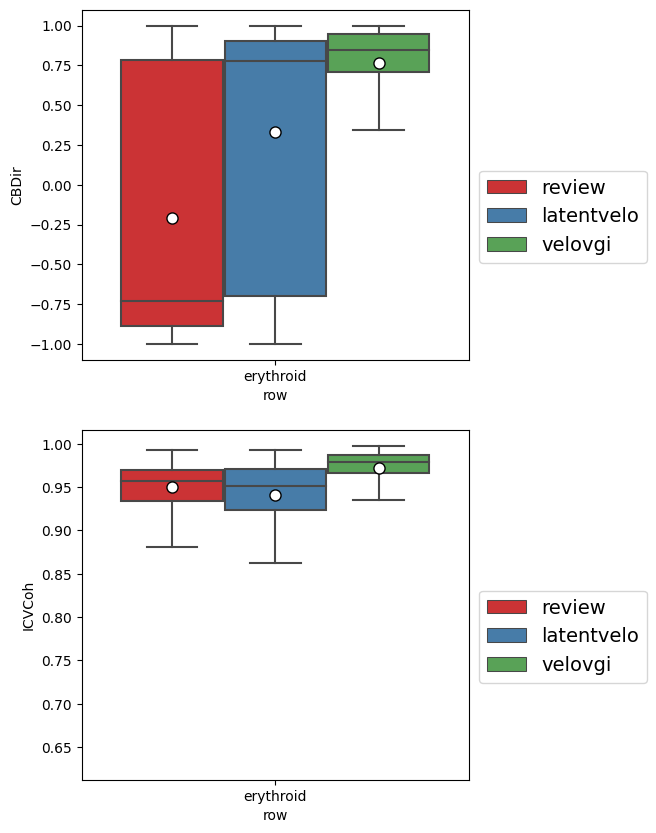

In [7]:
cluster_edges = [
    ("Blood progenitors 1", "Blood progenitors 2"), 
    ("Blood progenitors 2", "Erythroid1"), 
    ("Erythroid1", "Erythroid2"), 
    ("Erythroid2", "Erythroid3")
    ] # 已知的细胞类型间的分化信息

model_names = ["review_erythroid", "latentvelo_erythroid", "velovgi_erythroid"] # 指标结果名称遵循特定的规则：模型_数据
adata_list = [adata_review, adata_latentvelo, adata]

df = velovgi.tl.get_metric_total_df(model_names, adata_list, cluster_edges, cluster_key) # 指标计算
velovgi.pl.plot_metric_total_df(df) # 指标绘制

## 3. 图结构展示

1. 弦图

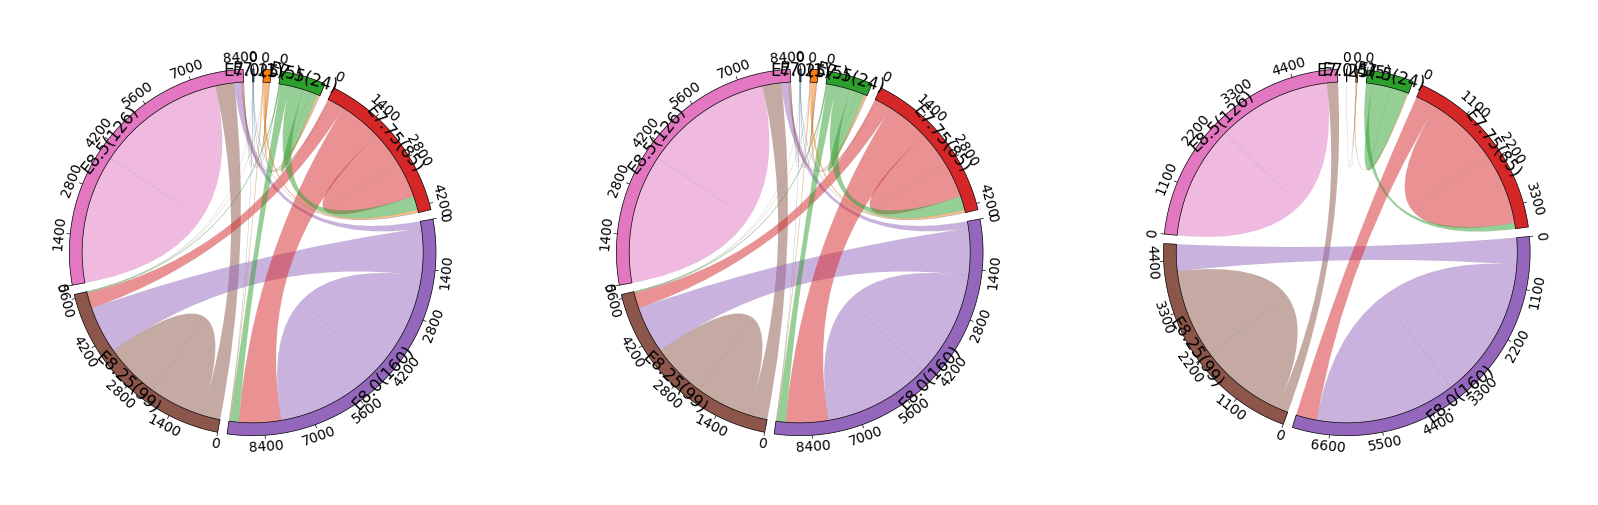

In [8]:
circos_fig, circos_ax = plt.subplots(1, 3, figsize=(20,5), subplot_kw=dict(projection="polar")) # 弦图


velovgi.pl.draw_batch_circos_ax(adata_review, batch_key=batch_key, ax=circos_ax[0])
velovgi.pl.draw_batch_circos_ax(adata_latentvelo, batch_key=batch_key, ax=circos_ax[1])
velovgi.pl.draw_batch_circos_ax(adata, batch_key=batch_key, ax=circos_ax[2])

2. 邻居个数图

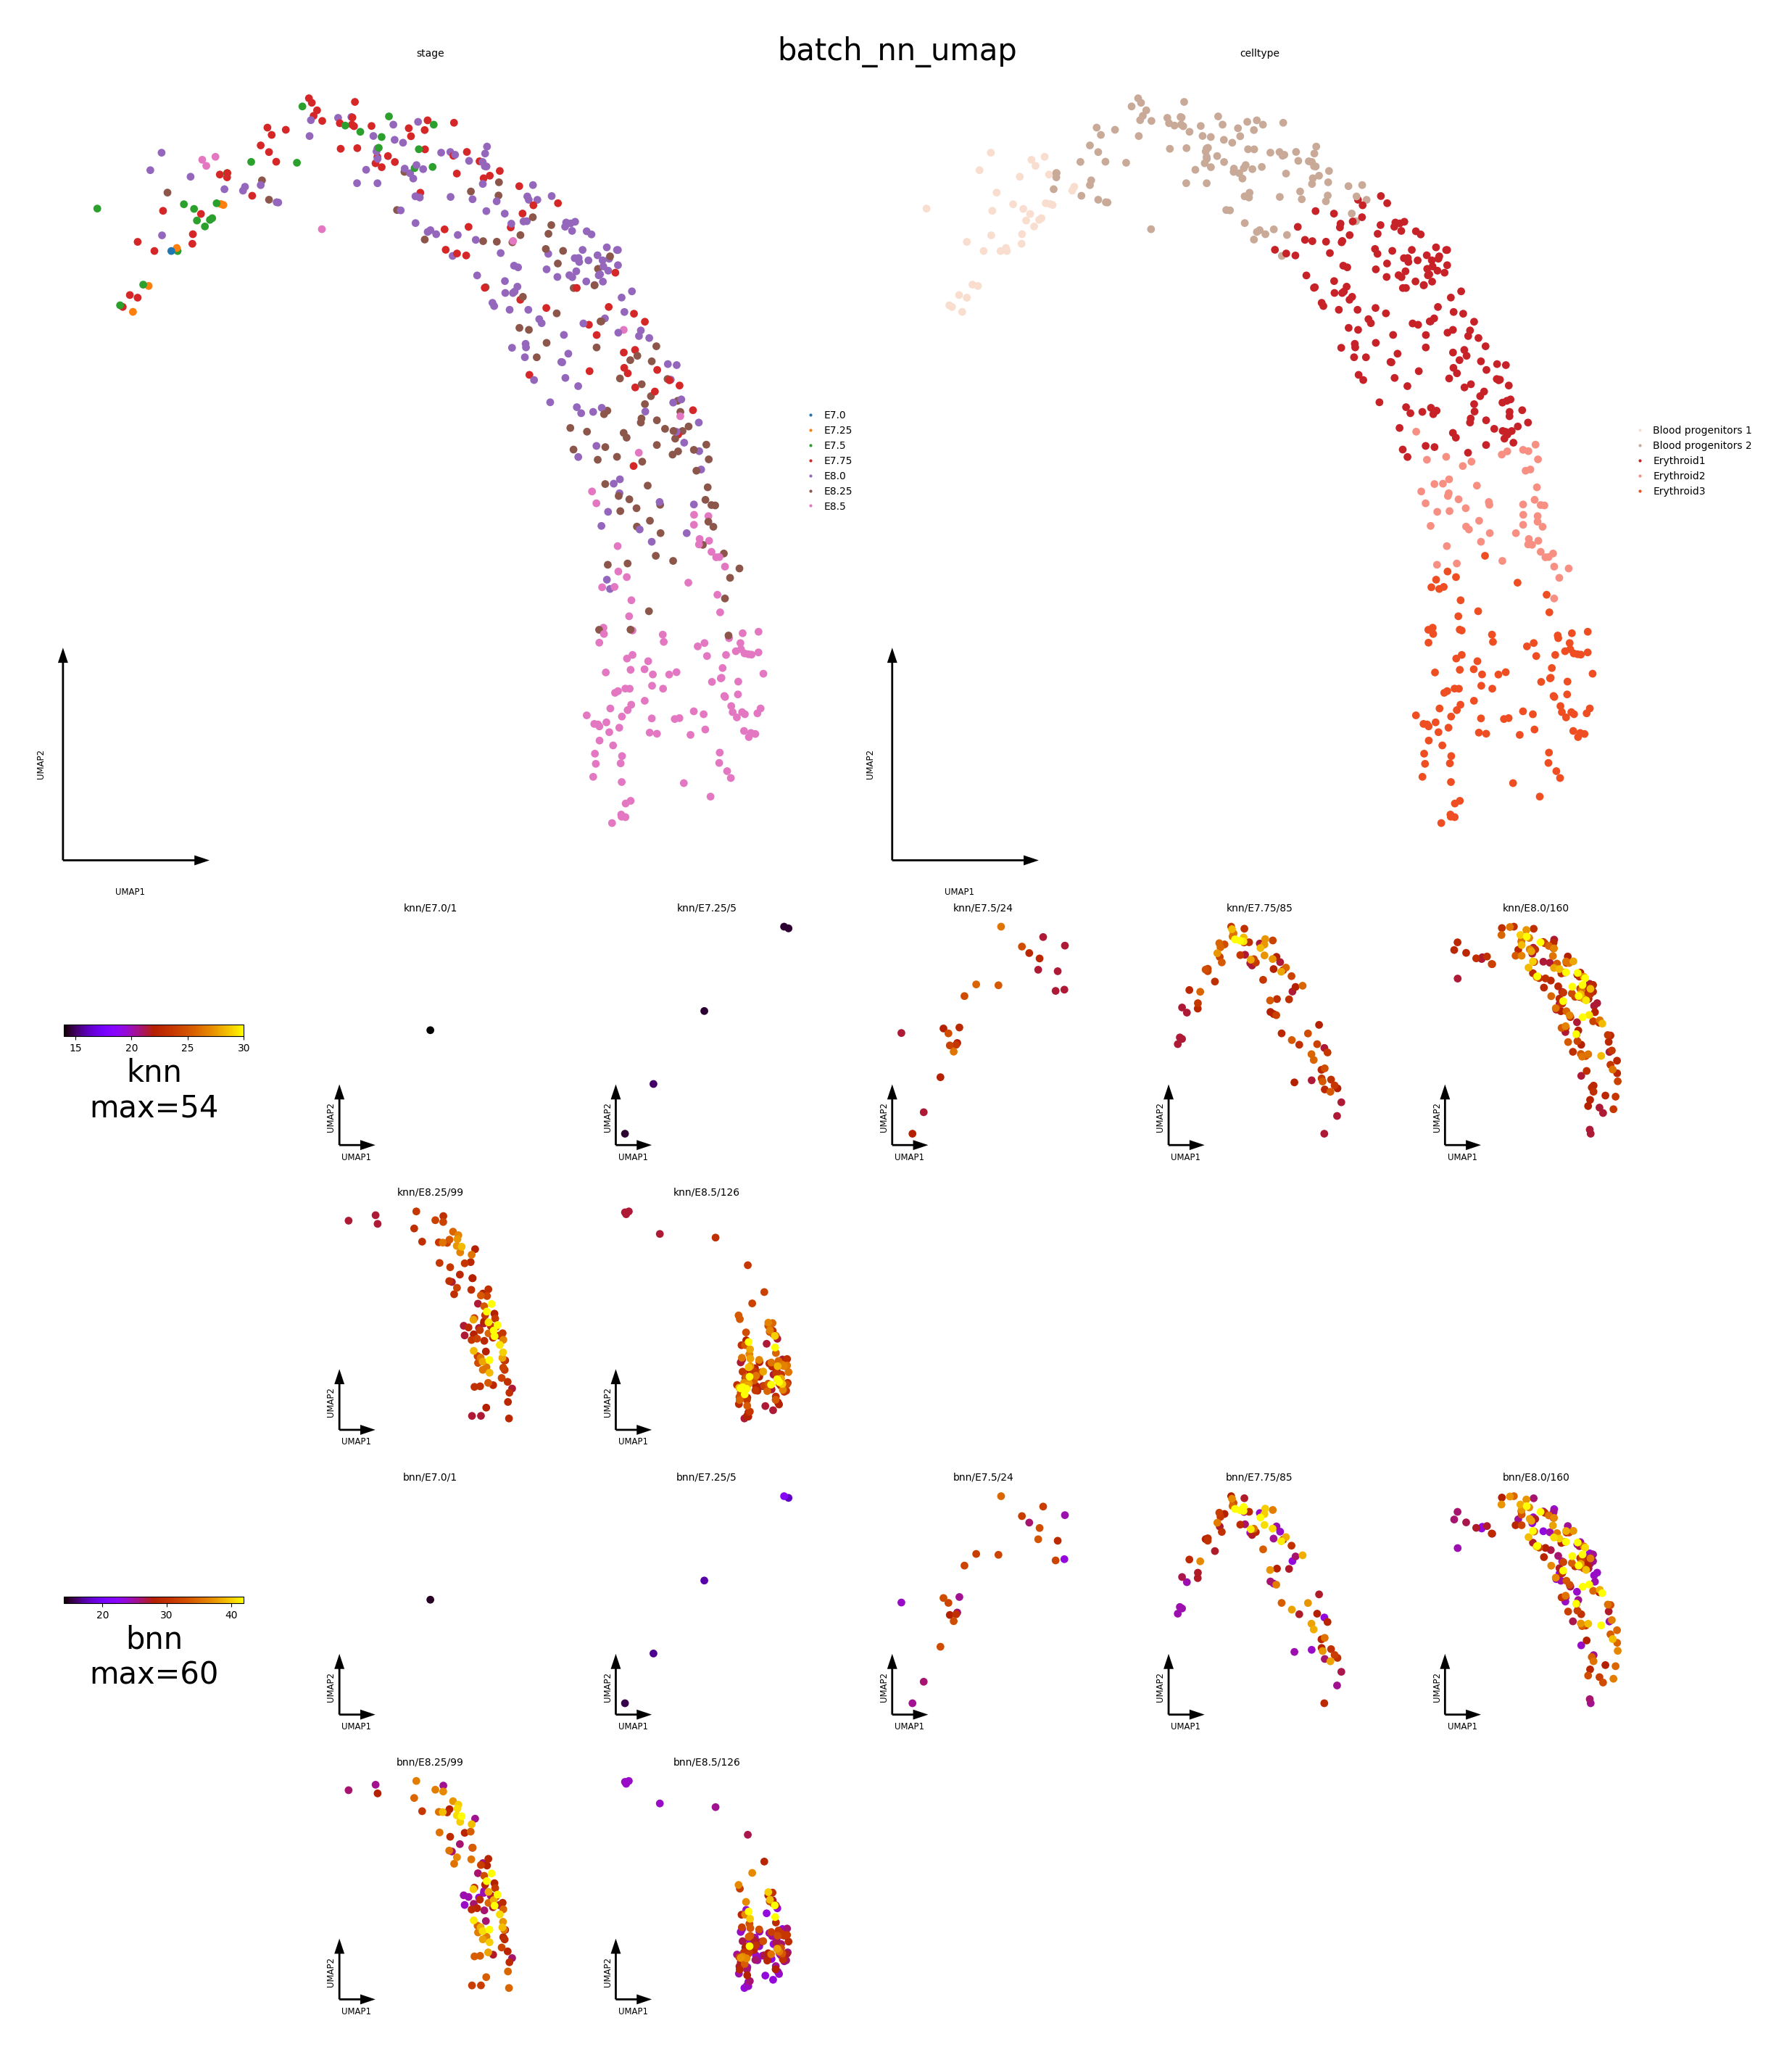

In [9]:
velovgi.pl.draw_batch_nn_umap(adata, batch_key=batch_key, cluster_key=cluster_key, save="tmp2.jpg")

## 基因速率的查看

In [11]:
adata.layers["velocity_u"] = adata.layers["velocity_u"].A

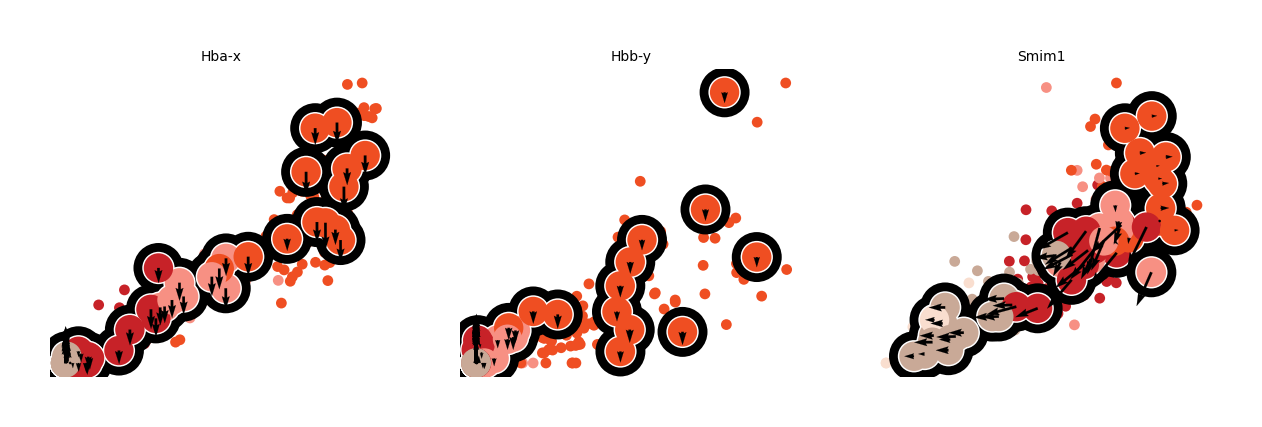

In [12]:
gene_list = ["Hba-x", "Hbb-y", "Smim1"]

velovgi.pl.draw_velocity_gene_list(adata, gene_list, cluster_key=cluster_key, cols=5)

## 4. 断点训练查看